# D2APR - Atividade Credit Card Fraud Detection

### Alunos: 
- Caio ()
- Carlos Caetano ()
- Gabrielly Baratela de Carvalho (CP3016331)

# Sumário

----------

## Introdução

**Motivação:** A detecção de fraudes em transações bancárias é uma medida extremamente relevante para que as companhias de cartões não prejudiquem o usuário, ao pagar uma conta de itens que não compraram. 

**Contexto:** Mundialmente, o comportamento da população com relação ao uso do dinheiro vem mudando, fazendo com que a maior parte da população utilize cartões como forma de pagamento ao invés da cédula, devido à praticidade e segurança. Com isso, as ameaças cibernéticas também crescem, e prejudicam tanto as instituições financeiras como seus clientes, aumentando a necessidade das empresas de acelerarem as medidas preventivas para ficarem à frente de atividades criminosas sofisticadas. As fraudes via cartão de crédito são as mais comuns em todo o mundo. No Brasil, $1/3$ da população (31%), já foi vítima dessa situação. 

_Fonte: [Relatório Global de Impacto de Fraude Financeira - IBM](https://filecache.mediaroom.com/mr5mr_ibmnewsroom/193031/MC%20%2B%20IBM%20Financial%20Fraud%20Study%20-%20Global%20Report%20Updated%203.8.22.pdf)_

**Objetivo:** Dado o contexto acima, o objetivo deste projeto é realizar uma modelagem capaz de identificar transações fraudulentas de cartões de crédito.

-----------------

## Conjunto de dados

* Fonte: [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
* Informação: transações realizadas via cartão de crédito por usuários de cartão europeus
* Período: 2 dias de Setembro/2013
* Covariáveis (_float_):
    - `V1, V2, ..., V27, V28`: componentes principais de uma transformação PCA (_float_)
        - _Nota: As covariáveis originais não podem ser disponibilizadas devido à privacidade dos dados)_
    - `Time`: Diferença dos segundos entre cada transação e a primeira transação da base de dados (_float_)
    - `Amount`: Valor transacionado na operação (_float_)
* Variável resposta: `Class` (_int/bool_)
    - _Classes: 1 se a transação é fraude, 0 caso contrário._

-----------------

## Ambiente

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotly.figure_factory import create_distplot
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

### Leitura dos dados

In [4]:
df = pd.read_csv('creditcard.csv')

Conferindo o formato dos dados e colunas

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.dropna().shape

(284807, 31)

O dataset não contém registros nulos, e todas as colunas já estão no formato correto

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A olho nú já é possível identificar potenciais outliers, por exemplo, na variável `V3`. Isso será melhor explorado a frente.

A média do valor de transações é relativamente baixo US$88, com o 3º quartil chegando a US$ 77, então são raras as transações de valor alto, e que acabam até puxando a média para cima.

In [9]:
df['Class'].value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Para a variável resposta, categórica, observa-se que a maioria das transações, ou seja 99,8% delas, são de transações não fraudulentas, evidenciando o desbalanceamento do dataset, o que deverá ser remediado a frente.

------------- 

## Análise Exploratória

**Critérios de avaliação** [1.0 pontos]
- Como cada variável se distribui?
- Correlação de variáveis;
- Gráficos que gerem insights para o tratamento de dados e/ou treinamento dos
modelos:
    - P. ex: detecção de ruídos via scatter plot;
- Discussão dos principais achados da análise exploratória de dados;

### Check de duplicidade

Para começar, já iremos testar se há registros duplicados completamente na base, isto é, os valores de dois registros são iguais para todas as colunas do dataframe.

In [102]:
print(df.shape)
print(df.drop_duplicates().shape)

print(f'\n Qtde de registros duplicados: {len(df) - len(df.drop_duplicates())}')

(284807, 31)
(283726, 31)

 Qtde de registros duplicados: 1081


In [ ]:
df = df.drop_duplicates()

### Analisando cada variável individualmente

In [39]:
numeric_columns = df.columns[~df.columns.isin(['Class'])]

Criando Plot para ter visibilidade da distribuição das classes fraude e não fraude

In [31]:
def formt_pie(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,.0f})".format(pct, absolute)

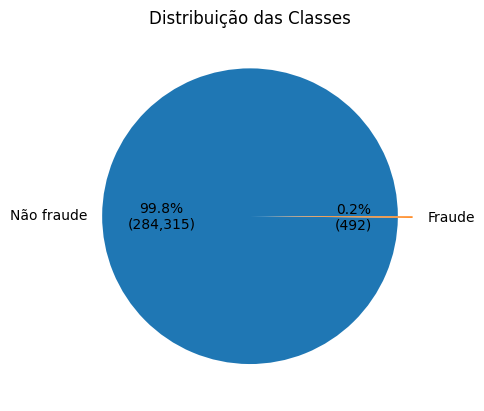

In [36]:
data = df['Class'].value_counts()
fig = data.plot(kind='pie', explode=[0, 0.1], title='Distribuição das Classes', labels=['Não fraude', 'Fraude'],
        autopct=lambda pct: formt_pie(pct, data))
fig.yaxis.set_visible(False)

Como as variáveis `V1, ..., V28` são resultado de um PCA, que espera-se que a escala das variáveis tenha sido padronizada antes do procedimento, vamos somente fazer um teste para descobrir qual foi o método escolhido para padronização.

Para as variáveis `Time` e `Amount`, queremos entender sua distribuição e se há possíveis outliers

C:\Users\gabrielly.baratela\AppData\Local\Temp\ipykernel_31172\1125727111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<AxesSubplot: xlabel='Time', ylabel='Density'>

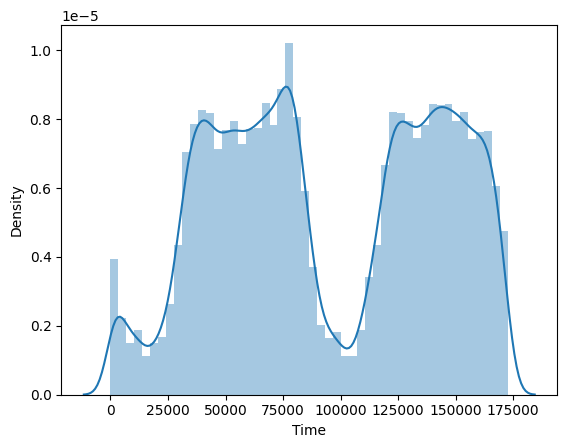

In [42]:
sns.distplot(df['Time'])

C:\Users\gabrielly.baratela\AppData\Local\Temp\ipykernel_31172\4019278676.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], color='g')


<AxesSubplot: xlabel='Amount', ylabel='Density'>

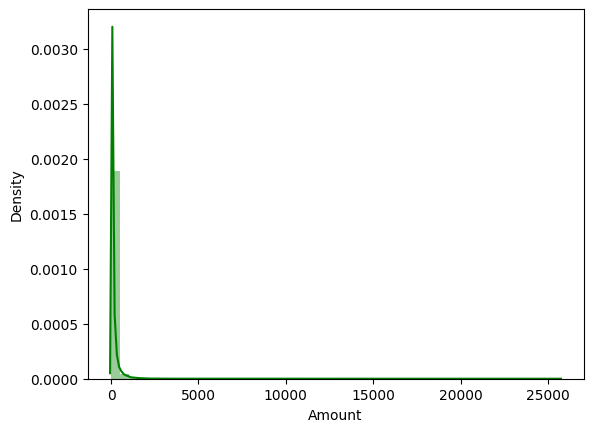

In [43]:
sns.distplot(df['Amount'], color='g')

#### Undersampling para estudo de correlação

In [64]:
n_us = int(round(len(df[df['Class']==1])*.75,0))
n_us

369

In [67]:
df_us_class0 = df[df['Class']==0].sample(n=n_us, random_state=42)
df_us_class1 = df[df['Class']==1].sample(n=n_us, random_state=42)

In [68]:
print(df_us_class0.shape, df_us_class1.shape)

(369, 31) (369, 31)


In [75]:
df_us = pd.concat([df_us_class0, df_us_class1], axis=0)

In [77]:
df_us.shape

(738, 31)

In [83]:
fig = px.box(df_us, x='Class', y="Amount", color='Class')
fig.show()

In [ ]:
fig = px.box(df_us, x='Class', y="Time", color='Class')
fig.show()

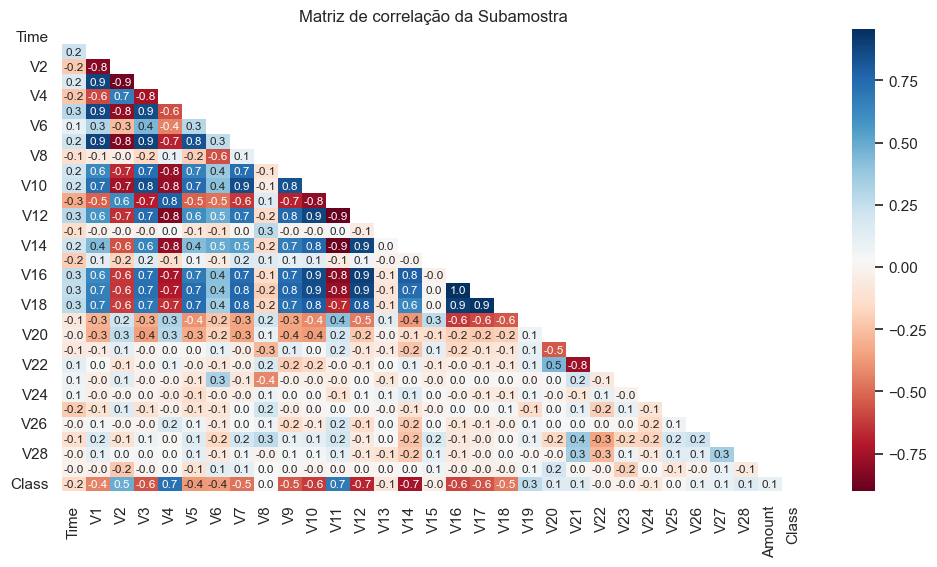

In [95]:
corr_us = df_us.corr()

sns.set(rc={'figure.figsize':(12,6)})
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

mask = np.triu(np.ones_like(corr_us, dtype=bool))

fig = sns.heatmap(corr_us, cmap='RdBu', mask=mask, annot=True, fmt='.1f', annot_kws={'fontdict':{'fontsize':8.5}})
fig.set_title('Matriz de correlação da Subamostra')
plt.show()

Usando como parâmetro uma correlação mínima absoluta de 0.7, temos como significantes apenas as variáveis `V4`, `V11`, `V12`, `V14`, sendo que a primeira e a segunda demonstram correlação positiva, ou seja, quanto maior o valor delas, mais chances da classe ser Fraude, e as duas últimas demonstram correlação negativa, ou seja, quanto maior o valor das variáveis, menor a chance da classe ser Fraude.

Além de identificar quais são correlacionadas com a classe, também é importante entender se não são correlacionadas umas às outras, para que não haja dependência linear entre as variáveis, pois, apesar de não ter impacto direto nos modelos de ML, pode gerar duplicidade de peso às informações em questão. Assim, é importante avaliar a necessidade de incluir mais de uma covariável que carrega a mesma informação para o modelo.

Todas elas são altamente correlacionadas entre si.

-----------

## Limpeza e preparação da base

### <REFERENCIA - EXCLUIR DEPOIS>

**Critérios de avaliação** [1.5 pontos]
- Exemplos:
    - Remoção de duplicidade e/ou outliers;
    - Preenchimento de dados faltantes;
    - Feature scaling;
    - Class imbalance; etc
- Discussão sucinta sobre a razão de cada etapa de limpeza e pré-processamento
considerada;


### Check de duplicidade

In [99]:
print(df.shape)
print(df.drop_duplicates().shape)

(284807, 31)
(283726, 31)


------------

## Treinamento e Validação

**Critérios de avaliação** [6 pontos]
- Comparar ao menos 3 algoritmos de classificação diferentes;
- Cross-Validation;
    - Métricas consideradas para o problema;
    - Discussão dos resultados;
    - Há overfitting ou underfitting?
- Fine-tunning
- Avaliação no conjunto de teste:
    - Avaliar os melhores modelos no conjunto de teste;
    - Discussão dos resultados.
- Trabalhos Futuros:
    - Discussão sobre estratégias/ideias/sugestões para a melhoria dos modelos;


--------

## Fontes de pesquisa

- https://www.researchgate.net/project/Fraud-detection-with-machine-learning
- https://di.ulb.ac.be/map/adalpozz/pdf/Dalpozzolo2015PhD.pdf
- https://www.researchgate.net/publication/351283764_Reproducible_Machine_Learning_for_Credit_Card_Fraud_Detection_-_Practical_Handbook/link/608ff90c458515d315f1392f/download
- https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

---------------
## Outras notas

**Relatório (Notebook):** [1 ponto]
- Organização do relatório;
- Clareza na apresentação dos textos e códigos;
- Qualidade do código;

**Atividades opcionais:** [até 1 ponto extra]
- Uso de técnicas não vistas em sala;
- Abordagem de negócios:
    - Motivação e descrição mais detalhada sobre o problema, com enfoque na resolução de problemas de negócio;
    - Definição de um baseline;
    - Comparação dos resultados com o baseline;
    - Conversão dos resultados (medidas técnicas) em medidas/performance de negócio:
        - P. ex, o que os 10% a mais de acurácia de seu modelo, frente ao baseline, impactaram no negócio da empresa?

**Submissão**
- Enviar somente UM NOTEBOOK